# Exercise 05


### Integrantes
    Oscar Mauricio Cepeda Valero
    Carlos Andres Paez Rojas
    Daniel Camilo Rojas Arcila

## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
retail = pd.read_csv('../EjerciciosModelosAvanzados1/example_retail_sales.csv')
retail.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [3]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(retail['ds'])
df['y'] = retail['y']
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


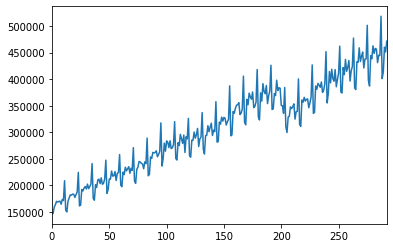

In [4]:
df['y'].plot();

In [5]:
y_log = pd.DataFrame(np.log(df['y']))
y_log = y_log.rename(columns={'y': 'y_log'})
y_log.head()

,y_log
0,11.893934
1,11.898725
2,11.978770
3,12.005601
4,12.043954


In [6]:
df = pd.concat([df, y_log], axis=1)
df.head()

,ds,y,y_log
0,1992-01-01,146376,11.893934
1,1992-02-01,147079,11.898725
2,1992-03-01,159336,11.978770
3,1992-04-01,163669,12.005601
4,1992-05-01,170068,12.043954


In [7]:
# Borrando el Y y renombrando elYlog por y
del df['y']
df = df.rename(columns={'y_log': 'y'})
df.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


In [8]:
df.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


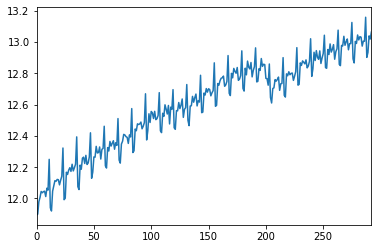

In [9]:
#Grlaficando el y (ya transfromado por la función log)
df['y'].plot();

- Recuerden, toca hacer el rolling forecast del ultimo 10% de fechas con prophet

In [10]:
history_train = df.head(int(len(df)*(0.9)))
history_train.tail()

,ds,y
258,2013-07-01,12.953606
259,2013-08-01,12.982986
260,2013-09-01,12.889672
261,2013-10-01,12.937815
262,2013-11-01,12.956571


In [11]:
test = df.tail(int(len(df)*(0.1)))
test.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


# Predicción Prophet del Log de Y

In [12]:
m = Prophet()
m.fit(history_train)
for t in range(1, len(test)+1):
    future = test[['ds']].head(t)
    forecast = m.predict(future)
    df_fcast = forecast[['ds', 'yhat']]
    df_fcast = df_fcast.rename(columns={'yhat': 'y'})
    frm = [history_train, df_fcast.tail(1)]
    history_train = pd.concat(frm)
    m = Prophet()
    m.fit(history_train)
    print('predicted= ', forecast[['ds', 'yhat']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.874869


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.874272
1 2014-02-01  12.868591


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.874049
1 2014-02-01  12.868086
2 2014-03-01  12.994934


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.873753
1 2014-02-01  12.867773
2 2014-03-01  12.994607
3 2014-04-01  12.982990


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.873923
1 2014-02-01  12.867748
2 2014-03-01  12.994239
3 2014-04-01  12.982199
4 2014-05-01  13.036055


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.873867
1 2014-02-01  12.867618
2 2014-03-01  12.994105
3 2014-04-01  12.981881
4 2014-05-01  13.035362
5 2014-06-01  13.019523


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.873196
1 2014-02-01  12.868040
2 2014-03-01  12.994460
3 2014-04-01  12.982178
4 2014-05-01  13.035610
5 2014-06-01  13.019507
6 2014-07-01  13.017971


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.872633
1 2014-02-01  12.867385
2 2014-03-01  12.994711
3 2014-04-01  12.982463
4 2014-05-01  13.035804
5 2014-06-01  13.019624
6 2014-07-01  13.017869
7 2014-08-01  13.043673


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.872663
1 2014-02-01  12.867414
2 2014-03-01  12.994733
3 2014-04-01  12.982513
4 2014-05-01  13.035872
5 2014-06-01  13.019701
6 2014-07-01  13.017948
7 2014-08-01  13.043746
8 2014-09-01  12.976981


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.871816
1 2014-02-01  12.866410
2 2014-03-01  12.993910
3 2014-04-01  12.982441
4 2014-05-01  13.035916
5 2014-06-01  13.019762
6 2014-07-01  13.018167
7 2014-08-01  13.043684
8 2014-09-01  12.976663
9 2014-10-01  13.007017


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.871090
1  2014-02-01  12.865444
2  2014-03-01  12.993033
3  2014-04-01  12.981552
4  2014-05-01  13.035635
5  2014-06-01  13.019566
6  2014-07-01  13.018001
7  2014-08-01  13.043565
8  2014-09-01  12.976435
9  2014-10-01  13.006622
10 2014-11-01  13.020068


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870483
1  2014-02-01  12.864757
2  2014-03-01  12.992197
3  2014-04-01  12.980646
4  2014-05-01  13.034685
5  2014-06-01  13.019122
6  2014-07-01  13.017563
7  2014-08-01  13.043169
8  2014-09-01  12.976114
9  2014-10-01  13.006293
10 2014-11-01  13.019648
11 2014-12-01  13.177564


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870333
1  2014-02-01  12.864337
2  2014-03-01  12.991646
3  2014-04-01  12.979867
4  2014-05-01  13.033861
5  2014-06-01  13.018285
6  2014-07-01  13.017225
7  2014-08-01  13.043029
8  2014-09-01  12.975987
9  2014-10-01  13.006164
10 2014-11-01  13.019468
11 2014-12-01  13.177323
12 2015-01-01  12.919010


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870378
1  2014-02-01  12.864394
2  2014-03-01  12.991686
3  2014-04-01  12.979905
4  2014-05-01  13.033888
5  2014-06-01  13.018329
6  2014-07-01  13.017280
7  2014-08-01  13.043085
8  2014-09-01  12.976037
9  2014-10-01  13.006213
10 2014-11-01  13.019530
11 2014-12-01  13.177405
12 2015-01-01  12.919131
13 2015-02-01  12.923821


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870680
1  2014-02-01  12.864586
2  2014-03-01  12.991309
3  2014-04-01  12.979344
4  2014-05-01  13.033075
5  2014-06-01  13.017478
6  2014-07-01  13.016480
7  2014-08-01  13.042871
8  2014-09-01  12.976034
9  2014-10-01  13.006401
10 2014-11-01  13.019841
11 2014-12-01  13.177567
12 2015-01-01  12.919191
13 2015-02-01  12.923337
14 2015-03-01  13.040641


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870837
1  2014-02-01  12.864704
2  2014-03-01  12.991411
3  2014-04-01  12.979296
4  2014-05-01  13.032898
5  2014-06-01  13.017022
6  2014-07-01  13.015925
7  2014-08-01  13.042243
8  2014-09-01  12.975896
9  2014-10-01  13.006282
10 2014-11-01  13.019743
11 2014-12-01  13.177601
12 2015-01-01  12.919103
13 2015-02-01  12.923329
14 2015-03-01  13.040649
15 2015-04-01  13.028817


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.871653
1  2014-02-01  12.865261
2  2014-03-01  12.991549
3  2014-04-01  12.979049
4  2014-05-01  13.032548
5  2014-06-01  13.016581
6  2014-07-01  13.015304
7  2014-08-01  13.041636
8  2014-09-01  12.975325
9  2014-10-01  13.006099
10 2014-11-01  13.019786
11 2014-12-01  13.177847
12 2015-01-01  12.919565
13 2015-02-01  12.923684
14 2015-03-01  13.040478
15 2015-04-01  13.028835
16 2015-05-01  13.081099


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.871346
1  2014-02-01  12.865925
2  2014-03-01  12.992054
3  2014-04-01  12.979416
4  2014-05-01  13.032516
5  2014-06-01  13.016422
6  2014-07-01  13.014964
7  2014-08-01  13.041037
8  2014-09-01  12.974662
9  2014-10-01  13.005436
10 2014-11-01  13.019351
11 2014-12-01  13.177577
12 2015-01-01  12.919463
13 2015-02-01  12.923958
14 2015-03-01  13.040739
15 2015-04-01  13.028837
16 2015-05-01  13.081310
17 2015-06-01  13.069849


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.871359
1  2014-02-01  12.865927
2  2014-03-01  12.992058
3  2014-04-01  12.979453
4  2014-05-01  13.032569
5  2014-06-01  13.016469
6  2014-07-01  13.015029
7  2014-08-01  13.041110
8  2014-09-01  12.974724
9  2014-10-01  13.005492
10 2014-11-01  13.019422
11 2014-12-01  13.177658
12 2015-01-01  12.919556
13 2015-02-01  12.924070
14 2015-03-01  13.040756
15 2015-04-01  13.028933
16 2015-05-01  13.081440
17 2015-06-01  13.069967
18 2015-07-01  13.066134


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.871154
1  2014-02-01  12.865631
2  2014-03-01  12.992399
3  2014-04-01  12.979733
4  2014-05-01  13.032812
5  2014-06-01  13.016358
6  2014-07-01  13.014770
7  2014-08-01  13.040654
8  2014-09-01  12.973922
9  2014-10-01  13.004792
10 2014-11-01  13.018788
11 2014-12-01  13.177226
12 2015-01-01  12.919372
13 2015-02-01  12.924098
14 2015-03-01  13.040318
15 2015-04-01  13.028766
16 2015-05-01  13.081215
17 2015-06-01  13.070048
18 2015-07-01  13.065905
19 2015-08-01  13.093772


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870702
1  2014-02-01  12.865043
2  2014-03-01  12.991980
3  2014-04-01  12.980075
4  2014-05-01  13.033181
5  2014-06-01  13.016699
6  2014-07-01  13.014825
7  2014-08-01  13.040533
8  2014-09-01  12.973580
9  2014-10-01  13.003980
10 2014-11-01  13.017946
11 2014-12-01  13.176401
12 2015-01-01  12.918727
13 2015-02-01  12.923610
14 2015-03-01  13.039428
15 2015-04-01  13.028552
16 2015-05-01  13.081091
17 2015-06-01  13.069860
18 2015-07-01  13.065981
19 2015-08-01  13.093542
20 2015-09-01  13.025376


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870266
1  2014-02-01  12.864464
2  2014-03-01  12.991499
3  2014-04-01  12.979606
4  2014-05-01  13.033402
5  2014-06-01  13.016986
6  2014-07-01  13.015136
7  2014-08-01  13.040643
8  2014-09-01  12.973540
9  2014-10-01  13.003735
10 2014-11-01  13.017048
11 2014-12-01  13.175512
12 2015-01-01  12.917953
13 2015-02-01  12.922929
14 2015-03-01  13.038568
15 2015-04-01  13.027780
16 2015-05-01  13.080865
17 2015-06-01  13.069696
18 2015-07-01  13.065769
19 2015-08-01  13.093511
20 2015-09-01  13.025194
21 2015-10-01  13.050280


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869993
1  2014-02-01  12.864179
2  2014-03-01  12.991244
3  2014-04-01  12.979304
4  2014-05-01  13.033023
5  2014-06-01  13.017089
6  2014-07-01  13.015300
7  2014-08-01  13.040817
8  2014-09-01  12.973673
9  2014-10-01  13.003806
10 2014-11-01  13.017119
11 2014-12-01  13.174809
12 2015-01-01  12.917391
13 2015-02-01  12.922488
14 2015-03-01  13.038106
15 2015-04-01  13.027205
16 2015-05-01  13.080449
17 2015-06-01  13.069518
18 2015-07-01  13.065649
19 2015-08-01  13.093301
20 2015-09-01  13.025152
21 2015-10-01  13.050273
22 2015-11-01  13.067850


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870001
1  2014-02-01  12.864184
2  2014-03-01  12.991253
3  2014-04-01  12.979310
4  2014-05-01  13.033015
5  2014-06-01  13.017091
6  2014-07-01  13.015292
7  2014-08-01  13.040820
8  2014-09-01  12.973672
9  2014-10-01  13.003791
10 2014-11-01  13.017090
11 2014-12-01  13.174787
12 2015-01-01  12.917340
13 2015-02-01  12.922452
14 2015-03-01  13.038120
15 2015-04-01  13.027206
16 2015-05-01  13.080409
17 2015-06-01  13.069493
18 2015-07-01  13.065599
19 2015-08-01  13.093291
20 2015-09-01  13.025136
21 2015-10-01  13.050239
22 2015-11-01  13.067795
23 2015-12-01  13.224035


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869899
1  2014-02-01  12.864008
2  2014-03-01  12.990992
3  2014-04-01  12.978965
4  2014-05-01  13.032579
5  2014-06-01  13.016690
6  2014-07-01  13.015304
7  2014-08-01  13.040825
8  2014-09-01  12.973716
9  2014-10-01  13.003837
10 2014-11-01  13.017125
11 2014-12-01  13.174810
12 2015-01-01  12.916461
13 2015-02-01  12.921529
14 2015-03-01  13.037551
15 2015-04-01  13.026480
16 2015-05-01  13.079514
17 2015-06-01  13.068661
18 2015-07-01  13.064958
19 2015-08-01  13.092706
20 2015-09-01  13.024665
21 2015-10-01  13.049833
22 2015-11-01  13.067489
23 2015-12-01  13.223791
24 2016-01-01  12.963193


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870080
1  2014-02-01  12.864012
2  2014-03-01  12.990999
3  2014-04-01  12.978842
4  2014-05-01  13.032383
5  2014-06-01  13.016381
6  2014-07-01  13.014928
7  2014-08-01  13.040826
8  2014-09-01  12.973704
9  2014-10-01  13.003842
10 2014-11-01  13.017188
11 2014-12-01  13.174836
12 2015-01-01  12.916415
13 2015-02-01  12.921324
14 2015-03-01  13.037373
15 2015-04-01  13.026029
16 2015-05-01  13.078933
17 2015-06-01  13.068170
18 2015-07-01  13.064452
19 2015-08-01  13.092430
20 2015-09-01  13.024372
21 2015-10-01  13.049603
22 2015-11-01  13.067236
23 2015-12-01  13.223567
24 2016-01-01  12.962922
25 2016-02-01  12.978694


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.870443
1  2014-02-01  12.864160
2  2014-03-01  12.990967
3  2014-04-01  12.978700
4  2014-05-01  13.032090
5  2014-06-01  13.016031
6  2014-07-01  13.014639
7  2014-08-01  13.040556
8  2014-09-01  12.973816
9  2014-10-01  13.004095
10 2014-11-01  13.017401
11 2014-12-01  13.175093
12 2015-01-01  12.916568
13 2015-02-01  12.920679
14 2015-03-01  13.037312
15 2015-04-01  13.025678
16 2015-05-01  13.078292
17 2015-06-01  13.067413
18 2015-07-01  13.063826
19 2015-08-01  13.091891
20 2015-09-01  13.024104
21 2015-10-01  13.049542
22 2015-11-01  13.067157
23 2015-12-01  13.223613
24 2016-01-01  12.962858
25 2016-02-01  12.977257
26 2016-03-01  13.094348


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.871063
1  2014-02-01  12.864679
2  2014-03-01  12.991089
3  2014-04-01  12.978555
4  2014-05-01  13.031854
5  2014-06-01  13.015737
6  2014-07-01  13.014269
7  2014-08-01  13.040248
8  2014-09-01  12.973516
9  2014-10-01  13.004171
10 2014-11-01  13.017609
11 2014-12-01  13.175544
12 2015-01-01  12.916970
13 2015-02-01  12.921034
14 2015-03-01  13.037729
15 2015-04-01  13.025521
16 2015-05-01  13.077873
17 2015-06-01  13.066846
18 2015-07-01  13.063333
19 2015-08-01  13.091562
20 2015-09-01  13.023861
21 2015-10-01  13.049637
22 2015-11-01  13.067408
23 2015-12-01  13.223727
24 2016-01-01  12.963046
25 2016-02-01  12.977455
26 2016-03-01  13.093595
27 2016-04-01  13.080784


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.871073
1  2014-02-01  12.864699
2  2014-03-01  12.991095
3  2014-04-01  12.978557
4  2014-05-01  13.031848
5  2014-06-01  13.015727
6  2014-07-01  13.014260
7  2014-08-01  13.040241
8  2014-09-01  12.973518
9  2014-10-01  13.004174
10 2014-11-01  13.017615
11 2014-12-01  13.175546
12 2015-01-01  12.916942
13 2015-02-01  12.920991
14 2015-03-01  13.037758
15 2015-04-01  13.025522
16 2015-05-01  13.077848
17 2015-06-01  13.066807
18 2015-07-01  13.063295
19 2015-08-01  13.091531
20 2015-09-01  13.023847
21 2015-10-01  13.049632
22 2015-11-01  13.067413
23 2015-12-01  13.223717
24 2016-01-01  12.962979
25 2016-02-01  12.977351
26 2016-03-01  13.093489
27 2016-04-01  13.080715
28 2016-05-01  13.136184


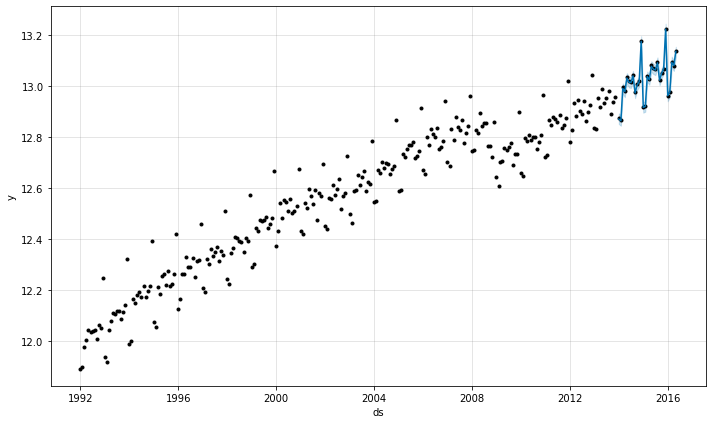

In [13]:
fig1 = m.plot(forecast)

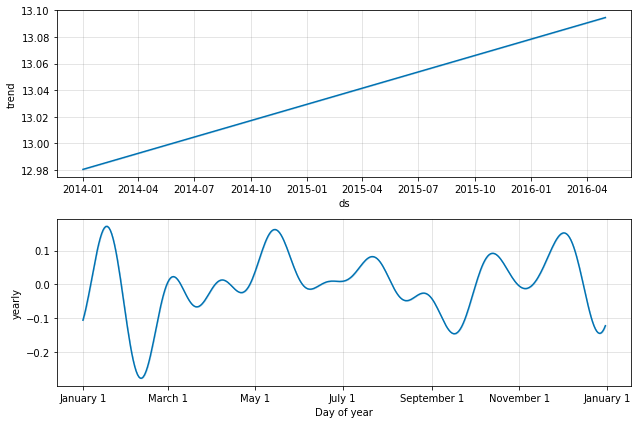

In [16]:
m.plot_components(forecast);

# Predicción Prophet de Y original

In [17]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(retail['ds'])
df['y'] = retail['y']
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [18]:
history_train = df.head(int(len(df)*(0.9)))
history_train.tail()

,ds,y
258,2013-07-01,422357
259,2013-08-01,434950
260,2013-09-01,396199
261,2013-10-01,415740
262,2013-11-01,423611


In [19]:
test = df.tail(int(len(df)*(0.1)))
test.tail()

,ds,y
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935
292,2016-05-01,471421


In [20]:
m = Prophet()
m.fit(history_train)
for t in range(1, len(test)+1):
    future = test[['ds']].head(t)
    forecast = m.predict(future)
    df_fcast = forecast[['ds', 'yhat']]
    df_fcast = df_fcast.rename(columns={'yhat': 'y'})
    frm = [history_train, df_fcast.tail(1)]
    history_train = pd.concat(frm)
    m = Prophet()
    m.fit(history_train)
    print('predicted= ', forecast[['ds', 'yhat']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  399172.297803


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400134.893949
1 2014-02-01  398991.531934


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400454.793058
1 2014-02-01  399334.644674
2 2014-03-01  434288.384636


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400052.397840
1 2014-02-01  398903.284956
2 2014-03-01  433838.814866
3 2014-04-01  430506.990697


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  399905.067242
1 2014-02-01  398748.427493
2 2014-03-01  433672.402762
3 2014-04-01  430320.435909
4 2014-05-01  447166.304039


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400435.343441
1 2014-02-01  399314.128815
2 2014-03-01  434277.693978
3 2014-04-01  430967.209474
4 2014-05-01  447839.912370
5 2014-06-01  442806.509474


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400484.535932
1 2014-02-01  399401.115334
2 2014-03-01  434373.181226
3 2014-04-01  431024.329337
4 2014-05-01  447872.181579
5 2014-06-01  442870.000690
6 2014-07-01  443124.192935


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400100.934772
1 2014-02-01  398911.920369
2 2014-03-01  433873.702428
3 2014-04-01  430548.470797
4 2014-05-01  447391.084780
5 2014-06-01  442379.413002
6 2014-07-01  442642.332576
7 2014-08-01  450728.386742


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400688.054812
1 2014-02-01  399569.668247
2 2014-03-01  434591.687385
3 2014-04-01  431264.536190
4 2014-05-01  448128.851574
5 2014-06-01  443126.161974
6 2014-07-01  443423.291149
7 2014-08-01  451544.457099
8 2014-09-01  431218.046088


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds           yhat
0 2014-01-01  400987.942870
1 2014-02-01  399881.341945
2 2014-03-01  434923.496803
3 2014-04-01  431642.748930
4 2014-05-01  448505.547465
5 2014-06-01  443506.937641
6 2014-07-01  443816.835877
7 2014-08-01  451957.323009
8 2014-09-01  431640.169333
9 2014-10-01  440732.322195


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400455.027975
1  2014-02-01  399375.665250
2  2014-03-01  434336.237209
3  2014-04-01  431066.716673
4  2014-05-01  447961.724058
5  2014-06-01  442929.380072
6  2014-07-01  443186.128990
7  2014-08-01  451330.708379
8  2014-09-01  430988.068480
9  2014-10-01  440060.171323
10 2014-11-01  444677.182420


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400766.249155
1  2014-02-01  399700.622449
2  2014-03-01  434715.114306
3  2014-04-01  431408.968377
4  2014-05-01  448333.462465
5  2014-06-01  443361.667151
6  2014-07-01  443627.471894
7  2014-08-01  451786.639242
8  2014-09-01  431482.739106
9  2014-10-01  440569.940802
10 2014-11-01  445221.804500
11 2014-12-01  495632.753949


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400280.122794
1  2014-02-01  399164.577871
2  2014-03-01  434179.870610
3  2014-04-01  430796.828591
4  2014-05-01  447604.924112
5  2014-06-01  442676.052195
6  2014-07-01  443030.496218
7  2014-08-01  451106.016794
8  2014-09-01  430752.458491
9  2014-10-01  439801.872602
10 2014-11-01  444364.384975
11 2014-12-01  494642.481865
12 2015-01-01  419197.803538


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400516.111058
1  2014-02-01  399398.616561
2  2014-03-01  434412.898986
3  2014-04-01  431110.378040
4  2014-05-01  447939.841092
5  2014-06-01  442998.099194
6  2014-07-01  443327.760398
7  2014-08-01  451437.745202
8  2014-09-01  431118.984348
9  2014-10-01  440174.681733
10 2014-11-01  444792.383223
11 2014-12-01  495164.147838
12 2015-01-01  419629.474487
13 2015-02-01  421790.176445


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400677.150811
1  2014-02-01  399622.159801
2  2014-03-01  434634.352295
3  2014-04-01  431382.878541
4  2014-05-01  448289.662119
5  2014-06-01  443266.565747
6  2014-07-01  443604.186872
7  2014-08-01  451791.704258
8  2014-09-01  431456.554637
9  2014-10-01  440584.057935
10 2014-11-01  445245.186761
11 2014-12-01  495653.025874
12 2015-01-01  420210.656474
13 2015-02-01  422378.486256
14 2015-03-01  452853.718265


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400594.761517
1  2014-02-01  399471.067671
2  2014-03-01  434474.779306
3  2014-04-01  431092.979870
4  2014-05-01  447947.820908
5  2014-06-01  442908.246021
6  2014-07-01  443155.488584
7  2014-08-01  451378.860850
8  2014-09-01  431139.972192
9  2014-10-01  440187.752555
10 2014-11-01  444793.763951
11 2014-12-01  495159.604800
12 2015-01-01  419621.970143
13 2015-02-01  421778.182550
14 2015-03-01  452330.900379
15 2015-04-01  450253.327970


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400481.628538
1  2014-02-01  399340.692400
2  2014-03-01  434326.097975
3  2014-04-01  430949.616480
4  2014-05-01  447772.202379
5  2014-06-01  442735.091574
6  2014-07-01  442969.737246
7  2014-08-01  451161.326449
8  2014-09-01  430889.286104
9  2014-10-01  440009.759763
10 2014-11-01  444596.956496
11 2014-12-01  494960.854046
12 2015-01-01  419455.529176
13 2015-02-01  421610.558592
14 2015-03-01  452039.522259
15 2015-04-01  450014.448792
16 2015-05-01  466907.572907


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400563.841018
1  2014-02-01  399453.931173
2  2014-03-01  434441.533815
3  2014-04-01  431047.901204
4  2014-05-01  447863.099821
5  2014-06-01  442824.324640
6  2014-07-01  443061.985471
7  2014-08-01  451132.967508
8  2014-09-01  430871.091785
9  2014-10-01  439996.363767
10 2014-11-01  444660.524139
11 2014-12-01  495048.841867
12 2015-01-01  419566.582582
13 2015-02-01  421731.070102
14 2015-03-01  452161.465559
15 2015-04-01  450107.777887
16 2015-05-01  467003.851556
17 2015-06-01  463580.502492


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400525.152017
1  2014-02-01  399422.160144
2  2014-03-01  434424.481050
3  2014-04-01  431055.054362
4  2014-05-01  447887.510342
5  2014-06-01  442862.337157
6  2014-07-01  443136.249378
7  2014-08-01  451222.331022
8  2014-09-01  430950.073778
9  2014-10-01  440072.891136
10 2014-11-01  444741.346539
11 2014-12-01  495144.393248
12 2015-01-01  419682.943269
13 2015-02-01  421867.729360
14 2015-03-01  452275.227731
15 2015-04-01  450261.904797
16 2015-05-01  467176.217994
17 2015-06-01  463761.987265
18 2015-07-01  463369.018121


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400583.494279
1  2014-02-01  399503.454857
2  2014-03-01  434536.001332
3  2014-04-01  431127.594325
4  2014-05-01  447932.086866
5  2014-06-01  442890.578672
6  2014-07-01  443149.803993
7  2014-08-01  451238.712902
8  2014-09-01  430874.861319
9  2014-10-01  440022.007314
10 2014-11-01  444706.983603
11 2014-12-01  495123.064818
12 2015-01-01  419635.776622
13 2015-02-01  421809.402413
14 2015-03-01  452391.632847
15 2015-04-01  450292.310604
16 2015-05-01  467149.143797
17 2015-06-01  463711.318149
18 2015-07-01  463296.542959
19 2015-08-01  471554.454173


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400556.556544
1  2014-02-01  399468.383330
2  2014-03-01  434506.015427
3  2014-04-01  431174.842757
4  2014-05-01  447985.122514
5  2014-06-01  442949.660035
6  2014-07-01  443211.437481
7  2014-08-01  451306.737638
8  2014-09-01  430956.164204
9  2014-10-01  440001.866838
10 2014-11-01  444690.259151
11 2014-12-01  495118.271377
12 2015-01-01  419671.264000
13 2015-02-01  421857.436676
14 2015-03-01  452382.140129
15 2015-04-01  450377.555057
16 2015-05-01  467246.211364
17 2015-06-01  463821.982336
18 2015-07-01  463413.011282
19 2015-08-01  471685.154865
20 2015-09-01  450690.085536


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400601.153596
1  2014-02-01  399580.951888
2  2014-03-01  434641.740053
3  2014-04-01  431316.479010
4  2014-05-01  448200.116522
5  2014-06-01  443169.967401
6  2014-07-01  443442.928399
7  2014-08-01  451556.773013
8  2014-09-01  431230.005466
9  2014-10-01  440340.429273
10 2014-11-01  444950.959577
11 2014-12-01  495398.089646
12 2015-01-01  419940.074475
13 2015-02-01  422141.255979
14 2015-03-01  452829.671905
15 2015-04-01  450790.826108
16 2015-05-01  467700.970133
17 2015-06-01  464263.474162
18 2015-07-01  463863.392502
19 2015-08-01  472166.559724
20 2015-09-01  451211.297893
21 2015-10-01  459083.315135


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400543.361481
1  2014-02-01  399499.101958
2  2014-03-01  434553.569130
3  2014-04-01  431238.543480
4  2014-05-01  448124.586620
5  2014-06-01  443135.899535
6  2014-07-01  443402.892776
7  2014-08-01  451514.775891
8  2014-09-01  431183.377977
9  2014-10-01  440295.700993
10 2014-11-01  444912.188679
11 2014-12-01  495269.427598
12 2015-01-01  419794.004480
13 2015-02-01  421992.098699
14 2015-03-01  452659.144977
15 2015-04-01  450650.162297
16 2015-05-01  467574.574028
17 2015-06-01  464150.722493
18 2015-07-01  463741.803244
19 2015-08-01  472046.269317
20 2015-09-01  451086.636907
21 2015-10-01  458970.977284
22 2015-11-01  464682.714365


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400478.591481
1  2014-02-01  399415.582346
2  2014-03-01  434460.021247
3  2014-04-01  431157.977897
4  2014-05-01  448048.178993
5  2014-06-01  443054.573330
6  2014-07-01  443324.189352
7  2014-08-01  451429.881444
8  2014-09-01  431091.645137
9  2014-10-01  440197.802691
10 2014-11-01  444811.142314
11 2014-12-01  495161.711981
12 2015-01-01  419726.978095
13 2015-02-01  421931.270654
14 2015-03-01  452429.155867
15 2015-04-01  450488.093187
16 2015-05-01  467451.221024
17 2015-06-01  464036.562315
18 2015-07-01  463631.299313
19 2015-08-01  471916.185870
20 2015-09-01  450933.318516
21 2015-10-01  458801.314443
22 2015-11-01  464502.111477
23 2015-12-01  515965.197131


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400433.644214
1  2014-02-01  399379.748749
2  2014-03-01  434416.667069
3  2014-04-01  431141.994185
4  2014-05-01  448032.698955
5  2014-06-01  443080.925300
6  2014-07-01  443405.521079
7  2014-08-01  451501.287622
8  2014-09-01  431157.539355
9  2014-10-01  440261.143645
10 2014-11-01  444855.157977
11 2014-12-01  495184.731575
12 2015-01-01  419708.201909
13 2015-02-01  421882.873414
14 2015-03-01  452456.587087
15 2015-04-01  450507.823607
16 2015-05-01  467453.059293
17 2015-06-01  464098.585922
18 2015-07-01  463723.462078
19 2015-08-01  472005.313868
20 2015-09-01  451031.506181
21 2015-10-01  458915.461663
22 2015-11-01  464582.230595
23 2015-12-01  516006.994630
24 2016-01-01  439017.337395


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400526.734978
1  2014-02-01  399414.147047
2  2014-03-01  434434.296863
3  2014-04-01  431037.431715
4  2014-05-01  447944.848813
5  2014-06-01  443002.779040
6  2014-07-01  443321.597733
7  2014-08-01  451492.171874
8  2014-09-01  431128.040753
9  2014-10-01  440205.122890
10 2014-11-01  444780.573404
11 2014-12-01  495088.893753
12 2015-01-01  419537.443018
13 2015-02-01  421660.753255
14 2015-03-01  452321.301097
15 2015-04-01  450170.827735
16 2015-05-01  467140.911099
17 2015-06-01  463812.400000
18 2015-07-01  463428.646205
19 2015-08-01  471757.156013
20 2015-09-01  450781.679144
21 2015-10-01  458642.522504
22 2015-11-01  464313.393751
23 2015-12-01  515727.576787
24 2016-01-01  438581.799776
25 2016-02-01  443902.844003


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400524.330239
1  2014-02-01  399372.723374
2  2014-03-01  434378.620116
3  2014-04-01  431001.466863
4  2014-05-01  447818.228401
5  2014-06-01  442886.803324
6  2014-07-01  443242.534788
7  2014-08-01  451385.282199
8  2014-09-01  431110.027940
9  2014-10-01  440183.947607
10 2014-11-01  444765.260932
11 2014-12-01  495094.019449
12 2015-01-01  419571.732072
13 2015-02-01  421673.909710
14 2015-03-01  452153.193364
15 2015-04-01  450103.681429
16 2015-05-01  466963.031137
17 2015-06-01  463682.377476
18 2015-07-01  463375.770456
19 2015-08-01  471661.735150
20 2015-09-01  450716.062140
21 2015-10-01  458560.271390
22 2015-11-01  464239.656525
23 2015-12-01  515699.974343
24 2016-01-01  438653.937152
25 2016-02-01  443968.763340
26 2016-03-01  477673.329738


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400548.860457
1  2014-02-01  399381.723793
2  2014-03-01  434371.196814
3  2014-04-01  431025.173678
4  2014-05-01  447856.059059
5  2014-06-01  442821.506548
6  2014-07-01  443171.520089
7  2014-08-01  451348.454068
8  2014-09-01  431043.025673
9  2014-10-01  440206.912950
10 2014-11-01  444794.689339
11 2014-12-01  495138.628228
12 2015-01-01  419636.038295
13 2015-02-01  421761.908111
14 2015-03-01  452105.121576
15 2015-04-01  450148.388563
16 2015-05-01  467058.441527
17 2015-06-01  463615.528646
18 2015-07-01  463322.204142
19 2015-08-01  471675.120383
20 2015-09-01  450689.355935
21 2015-10-01  458581.476607
22 2015-11-01  464270.948093
23 2015-12-01  515763.883401
24 2016-01-01  438758.773546
25 2016-02-01  444134.854335
26 2016-03-01  477838.275548
27 2016-04-01  471906.002148


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds           yhat
0  2014-01-01  400526.331576
1  2014-02-01  399365.698050
2  2014-03-01  434358.263069
3  2014-04-01  430999.460254
4  2014-05-01  447826.706687
5  2014-06-01  442792.651768
6  2014-07-01  443141.425406
7  2014-08-01  451318.468559
8  2014-09-01  431012.803897
9  2014-10-01  440178.463810
10 2014-11-01  444767.726859
11 2014-12-01  495109.785083
12 2015-01-01  419594.452775
13 2015-02-01  421718.508566
14 2015-03-01  452107.168827
15 2015-04-01  450115.042041
16 2015-05-01  467016.421697
17 2015-06-01  463574.672699
18 2015-07-01  463279.865497
19 2015-08-01  471635.018561
20 2015-09-01  450650.750926
21 2015-10-01  458547.995902
22 2015-11-01  464240.932731
23 2015-12-01  515729.106621
24 2016-01-01  438697.890125
25 2016-02-01  444064.490051
26 2016-03-01  477760.451331
27 2016-04-01  471858.976681
28 2016-05-01  488579.330701


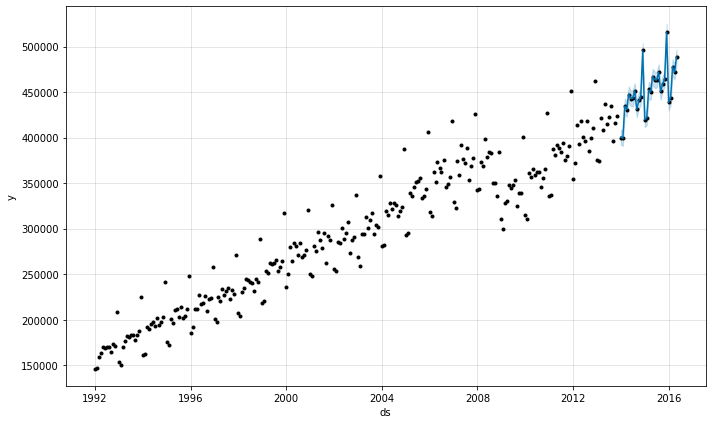

In [21]:
fig1 = m.plot(forecast)

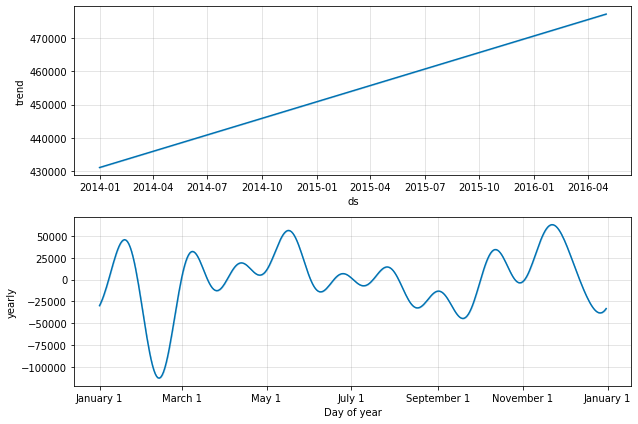

In [22]:
m.plot_components(forecast);